In [4]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import pylab as pl

from __future__ import division
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid

from sklearn.preprocessing import StandardScaler
import random
from scipy import optimize
import time
import seaborn as sns


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
###READ/LOAD DATA###
def read_data(file_name):
    """
    Read file into python. 
    Inputs: file_name(string)
    Return: Pandas datafame
    """
    assert os.path.exists(file_name), "That file does not exist!"
    if file_name[-3:] == "csv":
        df = pd.read_csv(file_name)
        return df
    
    if file_name[-3:] == "xls":
        df = pd.read_excel(file_name)
        return df

In [6]:
credit_data = read_data("credit-data.csv")

In [4]:
###EXPLORE DATA###
def get_col_means(df, column_names, return_value=True):
    '''
    Get the mean value of specified column
    Input:
    Return: Mean value(float) or print statement
    '''
    for i in range(len(column_names)):
        assert type(df[column_names[i]].iloc[0]) is not str, "Cannot take the mean of strings! Trying selecting another column." 
    
    mean_list = []
    for col in column_names:
        mean_list.append(df[col].mean())
        
    if return_value:
            return mean_list
    else:
        for i,val in enumerate(column_names):
            print("The mean of" + " " + val + " " "is" + " " + str(mean_list[i]))


In [5]:
get_col_means(credit_data, ["age", "DebtRatio"], return_value=False)

The mean of age is 52.2952066667
The mean of DebtRatio is 353.005075764


In [6]:
def get_statistics(df):
    '''Get general descriptive statistics for a data frame.'''
    return df.describe()

In [7]:
get_statistics(credit_data)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
def get_frequency_chart(df, column_name, chart_type):
    '''
    Display counts of a column's unique values. 
    
    Inputs: dataframe
            column_name - string
            chart_type - string in ['pie', 'bar', 'barh']
    '''
    plot = df[column_name].value_counts().plot(chart_type)
    plt.title('Distribution of' + ' ' + column_name)
    
    if chart_type == "bar":
        plot.set_xlabel(column_name)
        plot.set_ylabel('frequency')
        
    if chart_type == "barh":
        plot.set_xlabel('frequency')
        plot.set_ylabel(column_name)
        
    plt.show(plot)

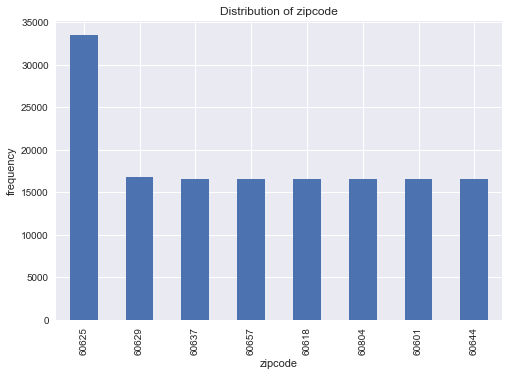

In [9]:
get_frequency_chart(credit_data, "zipcode", "bar")

In [10]:
def graph_crosstab(df, col1, col2):
    '''
    Graph crosstab of two discrete variables
    
    Inputs: Dataframe, column names (strings)
    '''
    
    pd.crosstab(df[col1], df[col2]).plot(kind='bar')
    plt.title(col2 + " " + "distribution by" + " " + col1)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

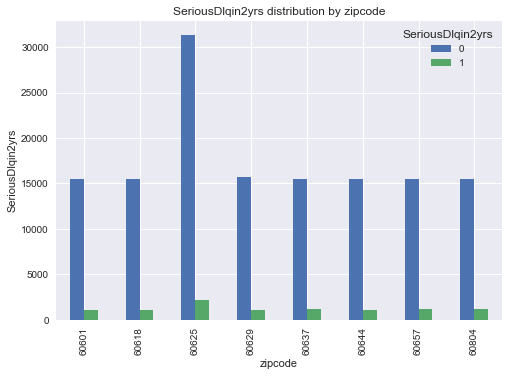

In [11]:
graph_crosstab(credit_data, 'zipcode', 'SeriousDlqin2yrs')

In [12]:
def stats_by_var(df, col_name, stat):
    '''
    Get descriptive statistics of all variables in dataframe, by selected column. The values 
    in the column should not be continous. 
    '''
    
    if stat == 'mean':
        return df.groupby(col_name).mean()  
        
    if stat == 'median':
        return df.groupby(col_name).median()        
    
    if stat == 'mode':
        return df.groupby(col_name).mode()  

In [13]:
stats = stats_by_var(credit_data, "SeriousDlqin2yrs", 'mean')
#stats[['DebtRatio', 'MonthlyIncome']]


In [7]:
###PRE-PROCESS AND CLEAN DATA###

def fill_missing(df, column_name, stat):
    """
    Fill in missing values for one column. 
    Inputs: dataframe
            column_name - string
            stat - string in [mean, median, mode]
    """
    mean = df[column_name].mean()
    median = df[column_name].median()
    mode = df[column_name].mode()
    
    if stat == 'mean':
        df[[column_name]] = df[[column_name]].fillna(value=mean)
        
    if stat == 'median':
        df[[column_name]] = df[[column_name]].fillna(value=median)
        
    if stat == 'mode':
        df[[column_name]] = df[[column_name]].fillna(value=mode)   

In [8]:
credit_data.isnull().sum()

PersonID                                    0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
zipcode                                     0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
fill_missing(credit_data, "MonthlyIncome", 'median')
fill_missing(credit_data, 'NumberOfDependents','mean')

In [10]:
credit_data.isnull().sum()

PersonID                                0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [11]:
###GENERATE FEATURES/PREDICTORS###

def discretize(df, col_name, new_col_name, quartiles, labels):
    '''
    Transform a continuous variable into discrete variable.
    
    Inputs: dataframe
            colum_name - string
            new_col_name - string
            quartiles - integer (ex: 2 creates bins above & below 50% percentile)
            labels - list of length blah; if None, retains range of values
            
    Return: dataframe with discrete variable column added
    '''
    df[new_col_name] = pd.qcut(df[col_name], quartiles, labels = labels)
    return df
    
def make_binary(df, column_names):
    '''
    Transform categorical variable into dummy variable and add columns to dataframe. 
    
    Inputs: dataframe
            column_names - list of strings
    Return: dataframe with dummy columns added
    '''
    return pd.get_dummies(df, columns = column_names)


In [12]:
discretize(credit_data, 'DebtRatio', "DebtRatio_cat", 8, None)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_cat
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.000000,"(0.5, 0.868]"
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.000000,"(0.0604, 0.175]"
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.000000,"(0.0604, 0.175]"
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.000000,"[0, 0.0604]"
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.000000,"[0, 0.0604]"
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.000000,"(0.367, 0.5]"
6,7,0,0.305682,57,60637,0,5710.000000,5400.0,8,0,3,0,0.000000,"(734, 329664]"
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.000000,"(0.175, 0.269]"
8,9,0,0.116951,27,60804,0,46.000000,5400.0,2,0,0,0,0.757222,"(0.868, 734]"
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.000000,"(0.5, 0.868]"


In [13]:
make_binary(credit_data, ['DebtRatio_cat'])

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"DebtRatio_cat_[0, 0.0604]","DebtRatio_cat_(0.0604, 0.175]","DebtRatio_cat_(0.175, 0.269]","DebtRatio_cat_(0.269, 0.367]","DebtRatio_cat_(0.367, 0.5]","DebtRatio_cat_(0.5, 0.868]","DebtRatio_cat_(0.868, 734]","DebtRatio_cat_(734, 329664]"
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,...,0,2.000000,0,0,0,0,0,1,0,0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,...,0,1.000000,0,1,0,0,0,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,...,0,0.000000,0,1,0,0,0,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,...,0,0.000000,1,0,0,0,0,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,...,0,0.000000,1,0,0,0,0,0,0,0
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,...,0,1.000000,0,0,0,0,1,0,0,0
6,7,0,0.305682,57,60637,0,5710.000000,5400.0,8,0,...,0,0.000000,0,0,0,0,0,0,0,1
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,...,0,0.000000,0,0,1,0,0,0,0,0
8,9,0,0.116951,27,60804,0,46.000000,5400.0,2,0,...,0,0.757222,0,0,0,0,0,0,1,0
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,...,0,2.000000,0,0,0,0,0,1,0,0


In [16]:
###MAGIC LOOP STUFF##

def define_clfs_params(grid_size):

    clfs = {'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
        'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
        'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'NB': GaussianNB(),
        'DT': DecisionTreeClassifier(),
        'SGD': SGDClassifier(loss="hinge", penalty="l2"),
        'KNN': KNeighborsClassifier(n_neighbors=3) 
            }

    large_grid = { 
    'RF':{'n_estimators': [1,10,100,1000,10000], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.0001,0.001,0.01,0.1,1,10]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [1,10,100,1000,10000], 'criterion' : ['gini', 'entropy'] ,'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
    'GB': {'n_estimators': [1,10,100,1000,10000], 'learning_rate' : [0.001,0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [1,3,5,10,20,50,100]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    #'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    small_grid = { 
    'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.001,0.1,1,10]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.001,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,50]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    #'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    test_grid = { 
    'RF':{'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'LR': { 'penalty': ['l1'], 'C': [0.01]},
    'SGD': { 'loss': ['perceptron'], 'penalty': ['l2']},
    'ET': { 'n_estimators': [1], 'criterion' : ['gini'] ,'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'AB': { 'algorithm': ['SAMME'], 'n_estimators': [1]},
    'GB': {'n_estimators': [1], 'learning_rate' : [0.1],'subsample' : [0.5], 'max_depth': [1]},
    'NB' : {},
    'DT': {'criterion': ['gini'], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    #'SVM' :{'C' :[0.01],'kernel':['linear']},
    'KNN' :{'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']}
           }
    
    if (grid_size == 'large'):
        return clfs, large_grid
    elif (grid_size == 'small'):
        return clfs, small_grid
    elif (grid_size == 'test'):
        return clfs, test_grid
    else:
        return 0, 0

def generate_binary_at_k(y_scores, k):
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

def metrics_at_k(y_true, y_scores, k):
    #get the predicted classifications
    preds_at_k = generate_binary_at_k(y_scores, k)
    precision = precision_score(y_true, preds_at_k)
    accuracy = accuracy_score(y_true, preds_at_k)
    return [precision, accuracy]

def plot_precision_recall_n(y_true, y_prob, model_name):
    from sklearn.metrics import precision_recall_curve
    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax1.set_ylim([0,1])
    ax1.set_ylim([0,1])
    ax2.set_xlim([0,1])
    
    name = model_name
    plt.title(name)
    plt.show()
    


def clf_loop(models_to_run, clfs, grid, X, y):
    results_df =  pd.DataFrame(columns=('model_type','clf', 'parameters', 'auc-roc','p_at_5',
                                        'acc_at_5','p_at_10', 'acc_at_10','p_at_20', 'acc_at_20','time'))
    for n in range(1, 2):
        # create training and valdation sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        for index,clf in enumerate([clfs[x] for x in models_to_run]):
            print (models_to_run[index])
            #create grid of all possible combination of parameters
            parameter_values = grid[models_to_run[index]]
            for p in ParameterGrid(parameter_values):
                try:
                    clf.set_params(**p)
                    start = time.time()
                    y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    # you can also store the model, feature importances, and prediction scores
                    # we're only storing the metrics for now
                    end = time.time()
                    y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
                    results_df.loc[len(results_df)] = [models_to_run[index],clf, p,
                                                       roc_auc_score(y_test, y_pred_probs),
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,5.0)[0],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,5.0)[1],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,10.0)[0],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,10.0)[1],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,20.0)[0],
                                                       metrics_at_k(y_test_sorted,y_pred_probs_sorted,20.0)[1], 
                                                       end - start]
                    if NOTEBOOK == 1:
                        plot_precision_recall_n(y_test,y_pred_probs,clf)
                except:
                    print ('Error:',e)
                    continue
    return results_df



def main(df):

    grid_size = 'test'
    clfs, grid = define_clfs_params(grid_size)
    #models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
    models_to_run = ['RF', 'DT', 'LR']
    features  =  ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'age', 'NumberOfTimes90DaysLate']
    X = df[features]
    y = df.SeriousDlqin2yrs
    results_df = clf_loop(models_to_run, clfs,grid, X,y)
    return results_df
    #if NOTEBOOK == 1:
        #print(results_df)
    #results_df.to_csv('results.csv', index=False)


RF
1493871716.617669


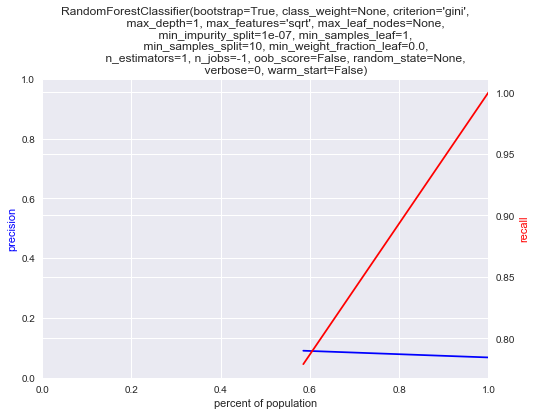

DT
1493871717.540303


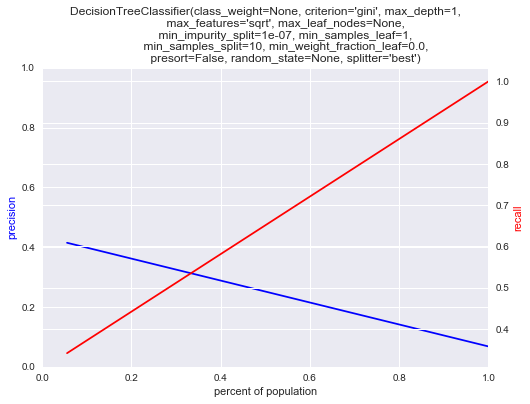

LR
1493871719.01087


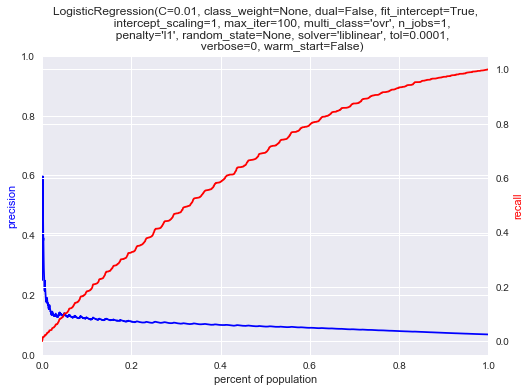

,model_type,clf,parameters,auc-roc,p_at_5,acc_at_5,p_at_10,acc_at_10,p_at_20,acc_at_20,time
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.603952,1.0000,0.98208,0.529067,0.937893,0.264533,0.837893,0.137771
1,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.653223,0.4640,0.92848,0.672533,0.966587,0.339600,0.867920,0.040453
2,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",0.645682,0.1392,0.89600,0.124533,0.856987,0.111200,0.776560,0.469225


In [15]:
main(credit_data)

In [ ]:
###BUILD MACHINE LEARNING CLASSIFIER###
model = LogisticRegression()
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'zipcode', 'DebtRatio', 'MonthlyIncome','NumberOfTimes90DaysLate']
model = model.fit(credit_data[features], credit_data.SeriousDlqin2yrs)

In [ ]:
model.predict(credit_data[features])[:10]

In [ ]:
###EVALUATE CLASSIFIER###
model.score(credit_data[features], credit_data.SeriousDlqin2yrs)

In [ ]:
credit_data.SeriousDlqin2yrs.mean()
#Accuracy is the nearly same as guessing 0 for everything! 

In [ ]:
print(classification_report(credit_data.SeriousDlqin2yrs, predicted))

In [ ]:
confusion_matrix(credit_data.SeriousDlqin2yrs, predicted)

In [ ]:
pd.DataFrame(np.transpose(model.coef_), features)